In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')

In [2]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

In [4]:
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [8]:
#Initializing Neural Network
classifier = Sequential()

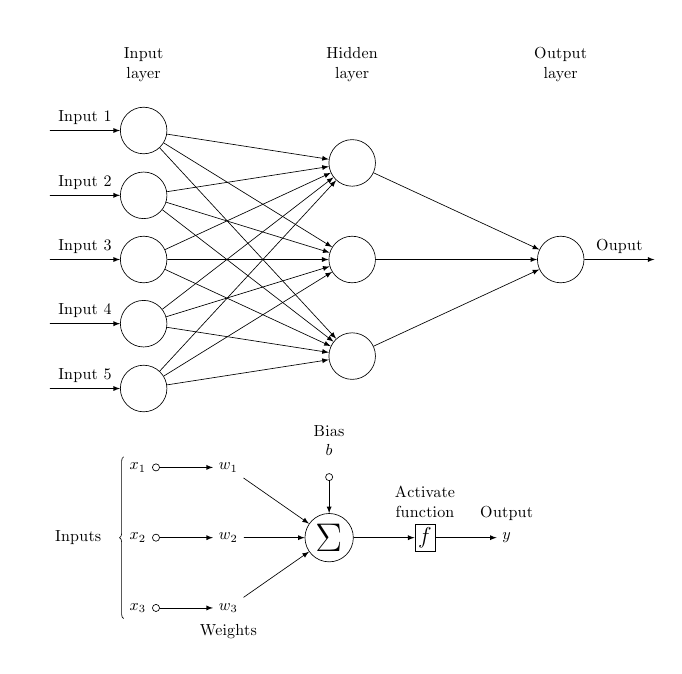

In [9]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 11))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform")`
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [10]:
# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
# Fitting our model 
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
8000/8000 [==============================] - 1s 161us/step - loss: 0.4799 - acc: 0.7959
Epoch 2/100
8000/8000 [==============================] - 1s 132us/step - loss: 0.4214 - acc: 0.7964
Epoch 3/100
8000/8000 [==============================] - 1s 123us/step - loss: 0.4151 - acc: 0.8144
Epoch 4/100
8000/8000 [==============================] - 1s 120us/step - loss: 0.4118 - acc: 0.8281
Epoch 5/100
8000/8000 [==============================] - 1s 124us/step - loss: 0.4093 - acc: 0.8331
Epoch 6/100
8000/8000 [==============================] - 1s 124us/step - loss: 0.4079 - acc: 0.8339
Epoch 7/100
8000/8000 [==============================] - 1s 129us/step - loss: 0.4065 - acc: 0.8349
Epoch 8/100
8000/8000 [==============================] - 1s 126us/step - loss: 0.4053 - acc: 0.8339
Epoch 9/100
8000/8000 [==============================] - 1s 117us/step - loss: 0.4044 - acc: 0.8352
Epoch 10/100
8000/8000 [==============================] - 1s 119us/step - loss: 0.4029 - acc: 0.8361

8000/8000 [==============================] - 1s 123us/step - loss: 0.3945 - acc: 0.8385
Epoch 83/100
8000/8000 [==============================] - 1s 125us/step - loss: 0.3947 - acc: 0.8379
Epoch 84/100
8000/8000 [==============================] - 1s 119us/step - loss: 0.3950 - acc: 0.8386
Epoch 85/100
8000/8000 [==============================] - 1s 117us/step - loss: 0.3950 - acc: 0.8386
Epoch 86/100
8000/8000 [==============================] - 1s 124us/step - loss: 0.3947 - acc: 0.8385
Epoch 87/100
8000/8000 [==============================] - 1s 119us/step - loss: 0.3947 - acc: 0.8391
Epoch 88/100
8000/8000 [==============================] - 1s 121us/step - loss: 0.3951 - acc: 0.8375
Epoch 89/100
8000/8000 [==============================] - 1s 120us/step - loss: 0.3949 - acc: 0.8382
Epoch 90/100
8000/8000 [==============================] - 1s 122us/step - loss: 0.3946 - acc: 0.8396
Epoch 91/100
8000/8000 [==============================] - 1s 122us/step - loss: 0.3939 - acc: 0.8389
Epo

In [12]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


In [13]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [14]:
cm


array([[1506,   86],
       [ 258,  150]])